In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import covariance


In [4]:
x = np.random.normal(size=1000)
epsilon = np.random.normal(0,3,len(x))
y = 5*x + epsilon
product = (x-np.mean(x))*(y-np.mean(y))
covariance_expected = np.mean(product)
print('Value of the covariance x and y: %s'%covariance_expected)

Value of the covariance x and y: 4.787417238219079


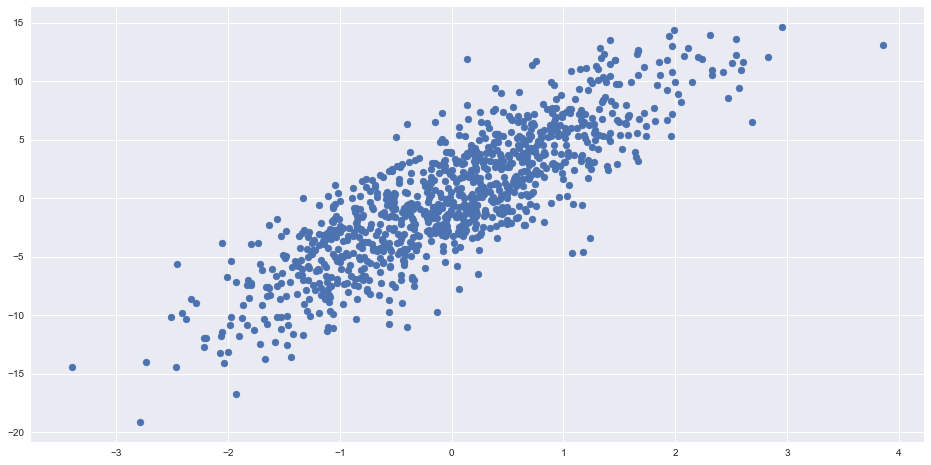

In [48]:
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
plt.scatter(x,y);

In [49]:
from statsmodels import regression
import statsmodels.api as sm

In [50]:
def linreg(x,y):
    #Running the linear regression
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    a = model.params[0]
    b = model.params[1]
    x = x[:,1]
    
    #Return summary of the regression and plot results
    x2 = np.linspace(x.min(),x.max(),100)
    y_hat = x2 * b + a
    plt.scatter(x,y,alpha=0.6) #plot the raw data
    plt.plot(x2,y_hat,'r',alpha=0.9) #plot the regression line
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     2581.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          5.09e-279
Time:                        14:45:38   Log-Likelihood:                -2513.4
No. Observations:                1000   AIC:                             5031.
Df Residuals:                     998   BIC:                             5041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0729      0.095      0.770      0.441      -0.113       0.258
x1             4.8219      0.095     50.804      0.000       4.636       5.008
==============================================================================
Omnibus:                        0.583   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.474
Skew:                          -0.040   Prob(JB):                        0.789
Kurtosis:                       3.071   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

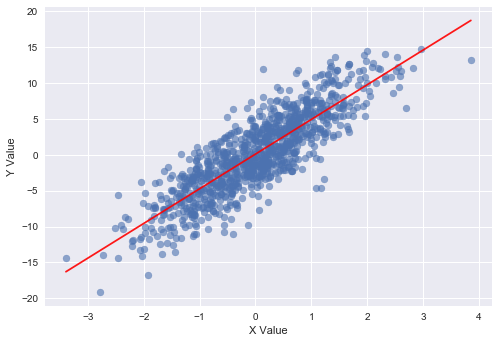

In [51]:
linreg(x,y)

In [52]:
import pandas_datareader.data as web
import datetime

In [53]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,11,1)

In [54]:
def log_return(ticker,start,end):
    df = web.DataReader(ticker,'yahoo',start,end)
    df[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    return df[ticker]

In [55]:
def portfolio_logr(tickers,start,end):
    portfolio = pd.concat([log_return(ticker,start,end) for ticker in tickers],axis=1)
    return portfolio


In [56]:
tickers = ['SPY', 'XLF', 'XLE', 'XLU','XLK', 'XLI', 'XLB', 'GE', 'GS', 'BRK-A', 'JPM', 'AAPL', 
           'MMM', 'BA','CSCO','KO', 'DIS','DD', 'XOM', 'INTC', 'IBM', 'NKE', 'MSFT', 'PG', 'UTX', 
           'HD', 'MCD', 'CVX','AXP','JNJ', 'MRK', 'CAT', 'PFE', 'TRV', 'UNH', 'WMT', 'VZ', 'QQQ',
           'BAC', 'F', 'C', 'CMCSA','MS', 'ORCL', 'PEP', 'HON', 'GILD', 'LMT', 'UPS', 'HP', 'FDX',
           'GD', 'SBUX']

In [57]:
portfolio_returns = portfolio_logr(tickers,start,end).dropna()

In [59]:
portfolio_returns.cov().head()

,SPY,XLF,XLE,XLU,XLK,XLI,XLB,GE,GS,BRK-A,...,ORCL,PEP,HON,GILD,LMT,UPS,HP,FDX,GD,SBUX
SPY,0.000074,0.000080,0.000081,0.000026,0.000088,0.000075,0.000075,0.000074,0.000095,0.000068,...,0.000075,0.000041,0.000073,0.000074,0.000053,0.000068,0.000092,0.000088,0.000067,0.000062
XLF,0.000080,0.000178,0.000090,0.000015,0.000085,0.000088,0.000086,0.000086,0.000142,0.000091,...,0.000082,0.000037,0.000081,0.000076,0.000059,0.000078,0.000107,0.000108,0.000080,0.000059
XLE,0.000081,0.000090,0.000182,0.000022,0.000083,0.000087,0.000101,0.000095,0.000110,0.000074,...,0.000081,0.000032,0.000079,0.000070,0.000048,0.000077,0.000253,0.000101,0.000069,0.000052
XLU,0.000026,0.000015,0.000022,0.000081,0.000025,0.000022,0.000022,0.000021,0.000004,0.000022,...,0.000026,0.000044,0.000027,0.000018,0.000022,0.000025,0.000008,0.000021,0.000021,0.000027
XLK,0.000088,0.000085,0.000083,0.000025,0.000124,0.000085,0.000084,0.000078,0.000104,0.000073,...,0.000096,0.000045,0.000084,0.000082,0.000061,0.000075,0.000091,0.000100,0.000076,0.000075


In [60]:
dates = portfolio_returns.resample('M').first().index

In [61]:
sample_covs = []
lw_covs = []
for i in range(1,len(dates)):
    #sample covariance matrices month by month
    sample_cov = portfolio_returns[dates[i-1]:dates[i]].cov().values
    sample_covs.append(sample_cov)
    #Ledoit-Wolf Covariance
    lw_cov = covariance.ledoit_wolf(portfolio_returns[dates[i-1]:dates[i]])[0]
    lw_covs.append(lw_cov)

In [62]:
lw_diffs = []
for pair in zip(lw_covs[:-1], lw_covs[1:]):
    diff = np.mean(np.sum(np.abs(pair[0] - pair[1])))
    lw_diffs.append(diff)
    
sample_diffs = []
for pair in zip(sample_covs[:-1], sample_covs[1:]):
    diff = np.mean(np.sum(np.abs(pair[0] - pair[1])))
    sample_diffs.append(diff)

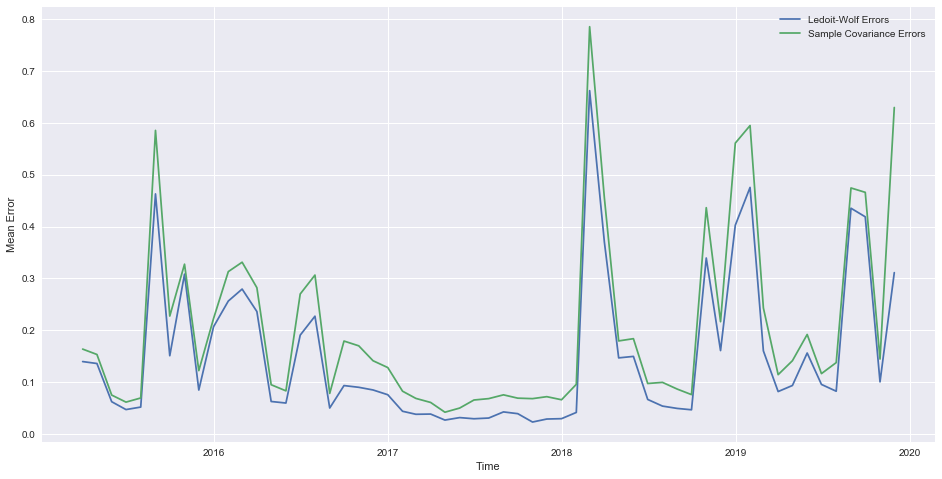

In [63]:
plt.figure(figsize=(16,8))
plt.plot(dates[2:], lw_diffs)
plt.plot(dates[2:], sample_diffs)
plt.xlabel('Time')
plt.ylabel('Mean Error')
plt.legend(['Ledoit-Wolf Errors', 'Sample Covariance Errors']);